### Import các thư viện cần thiết

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools

chosen_palette = ["#8500ad", "#cf00c1", "#fa00fa", "#963dea"] 
sns.set_palette(chosen_palette)

In [9]:
train = pd.read_csv('../data/train_preprocessed.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Khám phá dữ liệu

### Số lượng các hộ gia đình với số lượng thành viên trong hộ gia đình tương ứng

Text(0, 0.5, 'Number')

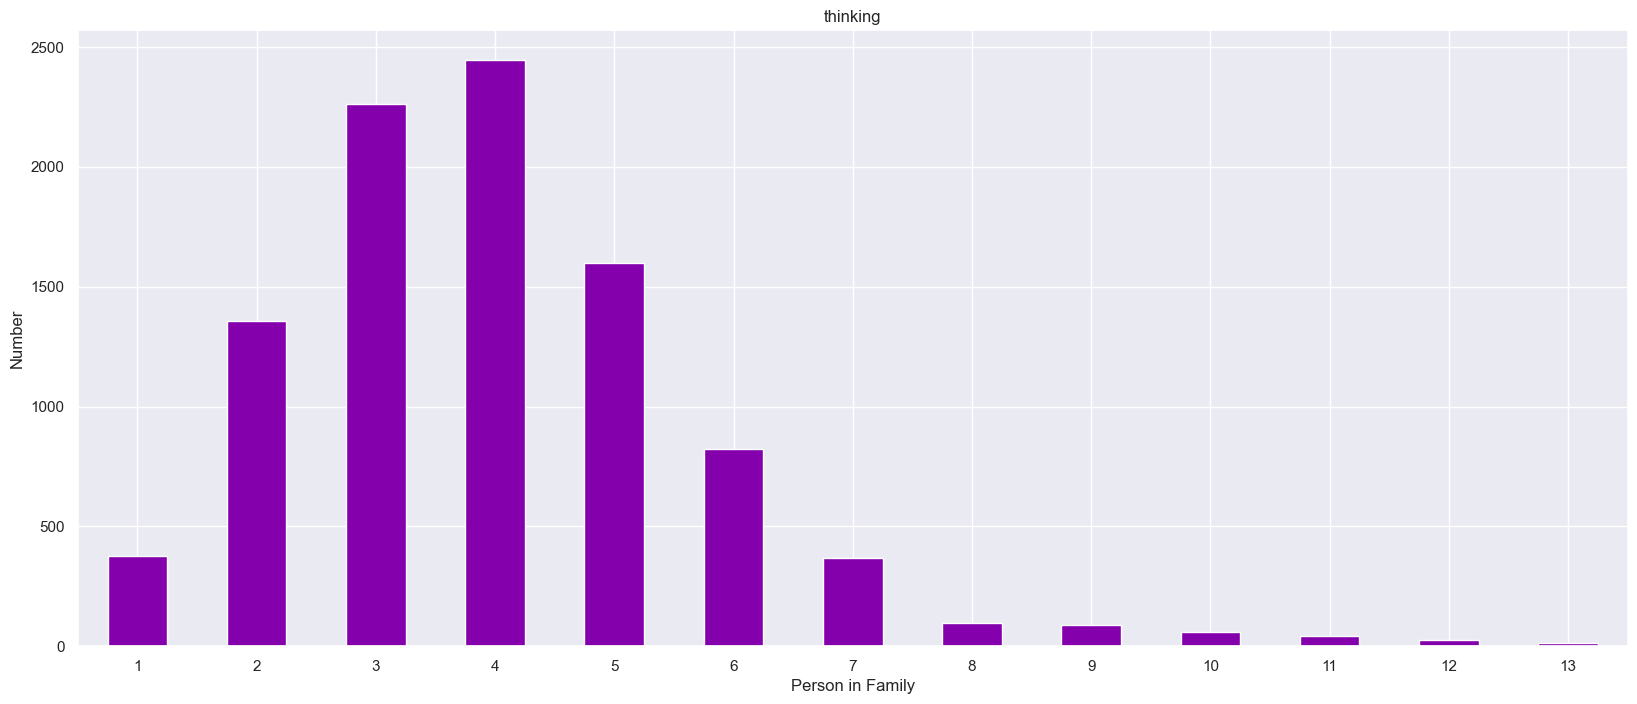

In [10]:
num_people = train['r4t3'].value_counts()
num_people = num_people.sort_index()

num_people.plot(kind='bar', figsize=(20, 8))
plt.title('thinking')
plt.xlabel('Person in Family')
plt.xticks(rotation=0)
plt.ylabel('Number')

#### Nhận xét: 
- Dựa vào biểu đồ, ta thấy rằng số lượng thành viên trong gia đình ở Costa Rica rất đa dạng, từ 1 người cho đến 13 người trong một gia đình.
- Đa số các hộ gia đình có từ 2 đến 5 thành viên là chính, đặc biệt là hộ gia đình có 3, 4 thành viên. 
- Từ 8 đến 13 thành viên trong một hộ gia đình, ta thấy có rất ít hộ. ít nhất là hộ gia đình có 13 thành viên

In [30]:
nop = pd.DataFrame()
nop['Number of People'] = train['r4t3']
nop['Target'] = train['Target']
nop

,Number of People,Target
0,1,4
1,1,4
2,1,4
3,4,4
4,4,4
...,...,...
9552,5,2
9553,5,2
9554,5,2
9555,5,2


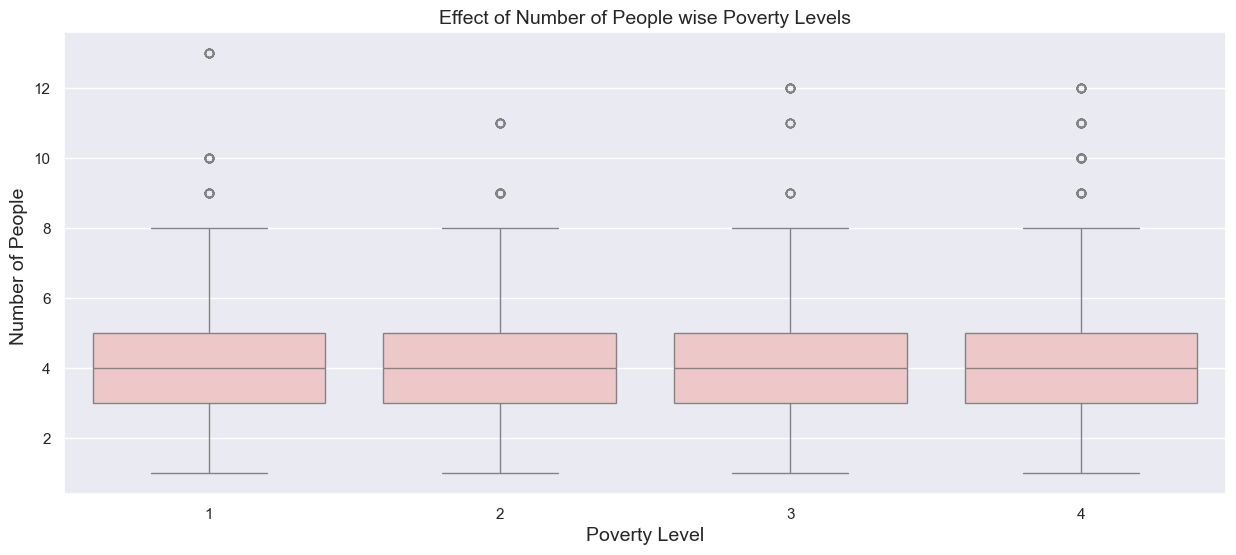

In [35]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="Target", y="Number of People",color = "#f4c2c2", data=nop)
plt.title("Effect of Number of People wise Poverty Levels", fontsize=14)
plt.xlabel('Poverty Level', fontsize=14)
plt.ylabel('Number of People ', fontsize=14)
plt.xticks(rotation=0)
plt.show()

#### Nhận xét:
- Dựa vào đồ thị ta thấy được rằng, đa số các hộ gia đình ở các mức độ kinh tế khác nhau có cùng giá trị tứ phân vị và trung vị và bằng 4
#####  - Tuy có các ngoại lai nhưng các ngoại lai đó lại khác nhau:
- Đối với hộ gia đình có kinh tế ở mức 1, các ngoại lai nằm rải rác từ 8 trở lên và có tồn tại một ngoại lai ở khoảng giá trị 12
- Đối với các hộ gia đình có mức kinh tế ở các mức còn lại, các ngoại lai nằm rải rác từ khoảng 8 đến 10, hộ gia đình có mức kinh tế 2 có ít ngoại lai nhất, trong khi hộ gia đình có kinh tế mức 4 có nhiều ngoại lai nhất

Text(0, 0.5, 'Number of household')

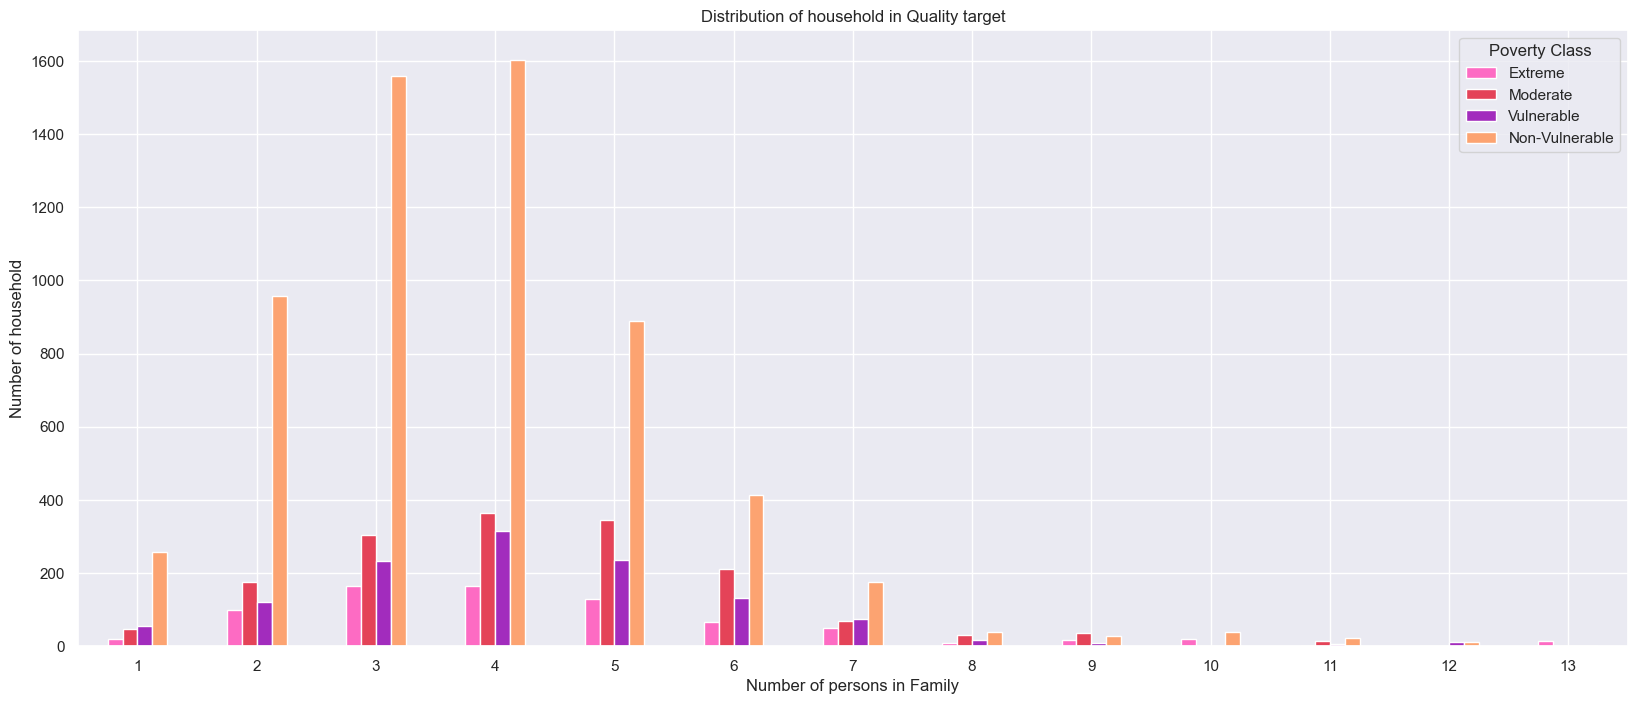

In [11]:
current = train.pivot_table(index='r4t3', columns='Target', aggfunc='size', fill_value=0)
current

current.plot(kind='bar', figsize=(20, 8), color=['#fd6bc3', '#e44358', '#a22cbd', '#fca371'])
plt.title('Distribution of household in Quality target')
plt.legend(labels=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'], title='Poverty Class', loc='upper right')
plt.xlabel('Number of persons in Family')
plt.xticks(rotation=0)
plt.ylabel('Number of household')

#### Nhận xét:
- Tiếp nối từ biểu đồ trên, kết hợp thêm cột `'Target'`, ta sẽ thấy được sự phân bố về kinh tế của các hộ gia đình.
- Ở các hộ gia đình có từ 7 thành viên trở xuống, tỉ lệ các hộ gia đình thuộc tầng lớp `Non-vulnerable` là áp đảo hoàn toàn so với các mức kinh tế khác. Theo sau đó đa phần là các hộ thuộc `Moderate`. Tuy nhiên với số lượng thành viên trong gia đình là 1 và 7 thì xếp thứ nhì chính là các hộ thuộc `Vulnerable`.
- Từ hộ gia đình có 8 thành viên trở đi, ta thấy có sự chuyển biến nhẹ. Hộ gia đình thuộc nhóm `Non-vulnerable` không còn luôn luôn chiếm ưu thế nữa. Thay vào đó nổi bật là `Moderate` và `Extreme`.
- Có thể thấy được rằng, với các hộ gia đình càng đông thành viên, thì thường họ sẽ có xu hướng khó khăn hơn về mặt kinh tế so với các hộ gia đình ít thành viên.

### Số lượng phòng và chất liệu làm tường của từng kiểu gia đình

In [12]:
wall_mat = train[['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']]
column_mapping = {
    'paredblolad': 'block or brick',
    'paredzocalo': 'socket',
    'paredpreb': 'prefabricated or cement',
    'pareddes': 'waste material',
    'paredmad': 'wood',
    'paredzinc': 'zinc',
    'paredfibras': 'natural fibers',
    'paredother': 'other'
}

wall_mat.rename(columns=column_mapping, inplace=True)
wall_mat

C:\Users\Lyliths\AppData\Local\Temp\ipykernel_2056\2989050859.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,block or brick,socket,prefabricated or cement,waste material,wood,zinc,natural fibers,other
0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9552,1,0,0,0,0,0,0,0
9553,1,0,0,0,0,0,0,0
9554,1,0,0,0,0,0,0,0
9555,1,0,0,0,0,0,0,0


In [13]:
original_categorical_variable = 'Material'
wall_mat_df = pd.DataFrame(columns=[original_categorical_variable])

for index, row in wall_mat.iterrows():
    category_index = row[row == 1].index[0]
    category_value = category_index.split('_')[-1]
    wall_mat_df.loc[index, original_categorical_variable] = category_value

wall_mat_df['Rooms'] = train['rooms']
wall_mat_df['Target'] = train['Target']
wall_mat_df

,Material,Rooms,Target
0,block or brick,3,4
1,wood,4,4
2,wood,8,4
3,block or brick,5,4
4,block or brick,5,4
...,...,...,...
9552,block or brick,6,2
9553,block or brick,6,2
9554,block or brick,6,2
9555,block or brick,6,2


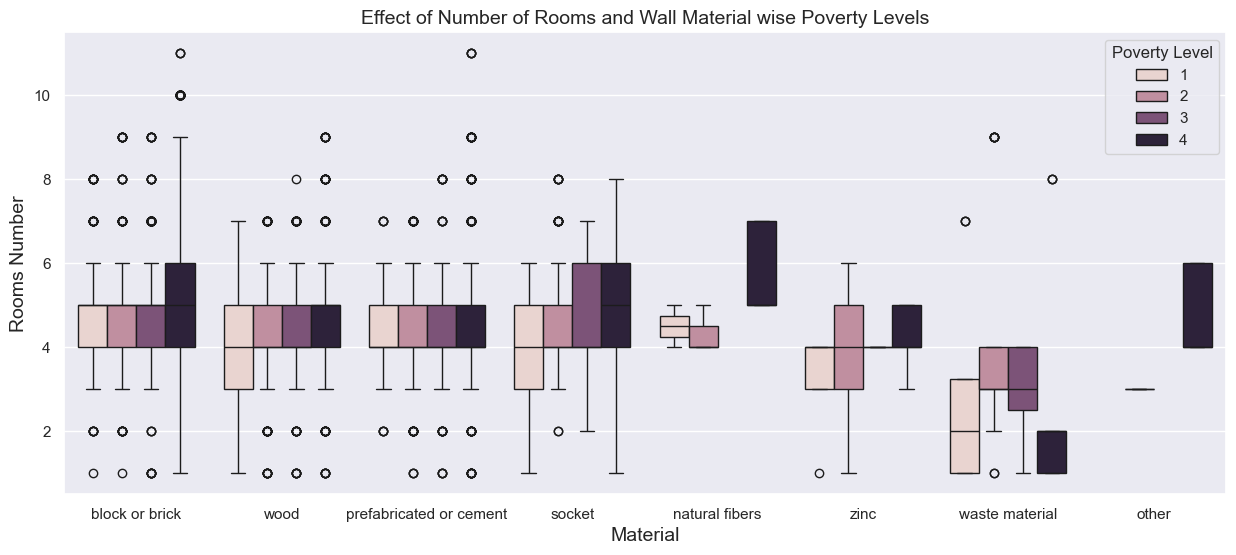

In [17]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="Material", y="Rooms", hue="Target", data=wall_mat_df)
plt.title("Effect of Number of Rooms and Wall Material wise Poverty Levels", fontsize=14)
plt.xlabel('Material', fontsize=14)
plt.ylabel('Rooms Number', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title = 'Poverty Level')
plt.show()

#### Nhận xét:
- Dựa vào đồ thị, ở đa số loại vật liệu, ta thấy rằng mức tứ phân vị số phòng chủ yếu từ khoảng 4 đến 6 ở các mức kinh tế khác nhau.
- Riêng vật liệu là `waste material` lại có các phần tử nằm ở khoảng từ 1 đến 4 phòng, không như các loại vật liệu khác. Và cũng chính loại vật liệu đó, đại đa số là các hộ gia đình có mức kinh tế 1.
- Loại vật liệu `socket` có nhiều hộ thuộc mức kinh tế 3, 4 sử dụng cho nhà 4 - 6 phòng.
- Loại vật liệu `block or brick` có nhiều ngoại lai nhất, trong khi loại vật liệu `zinc` có ít ngoại lai nhất